In [1]:
import matplotlib.pyplot as plt
import dsa
import random 
import string
import time

## Measure execution time with different message lengths

In [2]:
def run_dsa(message, L=512, N=160):
        p, q, g = dsa.gen_pubkeys(L=L, N=N) 
        x, y = dsa.gen_userkeys(p, q ,g) 
        r, s, message = dsa.sign_message(message, p, q, g, x) 
        verified = dsa.verify_message(message, p, q, g, r, s, y)
        assert verified == True
        return

#### How does execution time for key generation depend on bit lengths

In [17]:
%%timeit
_,_,_ = dsa.gen_pubkeys(L=512, N=160) 

121 ms ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
_,_,_ = dsa.gen_pubkeys(L=1024, N=160) 

261 ms ± 66.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%timeit
_,_,_ = dsa.gen_pubkeys(L=512, N=10) 

9.27 ms ± 651 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
_,_,_ = dsa.gen_pubkeys(L=1024, N=10) 

56.3 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
x = [] # Message length
y = [] # Execution time
for i in range(10000):
    if i%250==0:
        print("Done with", i)
    M = ''.join(random.choice(string.ascii_letters) for i in range(i))
    start = time.time()
    run_dsa(M)
    end_time = time.time() - start
    x.append(i)
    y.append(end_time)

Done with 0
Done with 250
Done with 500
Done with 750
Done with 1000
Done with 1250
Done with 1500
Done with 1750
Done with 2000
Done with 2250
Done with 2500
Done with 2750
Done with 3000
Done with 3250
Done with 3500
Done with 3750
Done with 4000
Done with 4250
Done with 4500
Done with 4750
Done with 5000
Done with 5250
Done with 5500
Done with 5750
Done with 6000
Done with 6250
Done with 6500
Done with 6750
Done with 7000
Done with 7250
Done with 7500
Done with 7750
Done with 8000
Done with 8250
Done with 8500
Done with 8750
Done with 9000
Done with 9250
Done with 9500
Done with 9750


[]

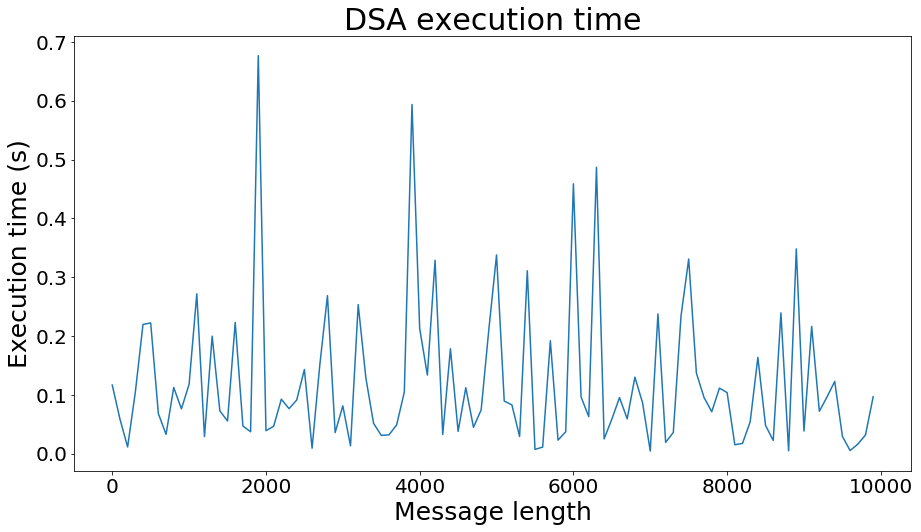

In [61]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(x[0:len(x):100], y[0:len(x):100])
ax.set_xlabel('Message length', fontsize=25)
ax.set_ylabel('Execution time (s)', fontsize=25)
ax.set_title('DSA execution time', fontsize=30)
ax.tick_params(labelsize=20)
plt.savefig('figures/DSA_exectime')
plt.plot()